## Title: Cleaning the Artificial Dataset with simple EDA
### Dataset Piror knowledge:
* The Dataset contains monthly summary of business operation of a number of companies from some regions
* Detailed description of the variables:


| Variable Name     | Description                            | 
|-------------------|----------------------------------------|
| Date              | Months of observations                 | 
| CompanyID         | Company's ID in the system             | 
| Revenue           | Monthly Company's Revenue              | 
| Expenses          | Monthly Company's Expenses             | 
| Profit            | Monthly Company's Profit               | 
| LossFlag          | Monthly balance check                  | 
| Employees         | Number of employees in the company     | 
| Region            | Company's geographical location        | 
| BusinessValuation | Company's Market Value                 | 
| ClosedFlag        | The company is no longer in the market | 


## Plan:
1. Check entire dataset

2. Find missing values and address the following issue:

    * missed one value out of revenue, expenses, and profit with existed the other two. Calculate missed values using following question:<br> *Profit = Revenue - Expenses*
    * if there are more than one value missed in one row we will use an imputation method to add the missed values (later on we will decide which method will be more suitable for this use case)
    * Make sure that there is no NaN in the other variables for open businesses. Impute a values if there is any.
    * Will keep NaN if revenue, expenses, profit, and businessvaluation is NaN. I will replace them with np.NaN, to make sure that they are actual NaN. We may replace them with 0 or -inf, but most of the software will ignore any values with NaN for computation.
    * address any other issues if they are existing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Load and check the basic stat of the dataset

In [2]:
# load dataset from .csv
df_initial = pd.read_csv('financial_artificial_dataset_AK.csv')

In [4]:
# Look at head
df_initial.head()

,Date,CompanyID,Employees,Revenue,Expenses,Profit,LossFlag,Region,BusinessValuation,CloseFlag
0,2016-01-01,26,54,929805.23,274406.75,655398.48,0.0,A,44840.36,False
1,2016-02-01,26,54,945682.01,316877.41,628804.60,0.0,A,50344.14,False
2,2016-03-01,26,54,809434.40,252932.49,556501.91,0.0,A,40175.79,False
3,2016-04-01,26,54,924571.51,307911.34,616660.17,0.0,A,42020.35,False
4,2016-05-01,26,54,676168.26,354345.84,321822.42,0.0,A,19198.59,False


In [5]:
# Look at info
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
Date                 1200 non-null object
CompanyID            1200 non-null int64
Employees            1200 non-null int64
Revenue              1155 non-null float64
Expenses             1154 non-null float64
Profit               1154 non-null float64
LossFlag             1154 non-null float64
Region               1200 non-null object
BusinessValuation    1166 non-null float64
CloseFlag            1200 non-null bool
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 85.6+ KB


In [6]:
# convert CloseFlag to int, thus can see stat for this column
df_initial['CloseFlag'] = df_initial['CloseFlag'].astype('int')

### Print some info and stat of the dataset

In [7]:
display(df_initial.dtypes)
display(df_initial.describe())
print('\nNaN STATISTICS')
display(df_initial.isna().sum())

Date                  object
CompanyID              int64
Employees              int64
Revenue              float64
Expenses             float64
Profit               float64
LossFlag             float64
Region                object
BusinessValuation    float64
CloseFlag              int32
dtype: object

,CompanyID,Employees,Revenue,Expenses,Profit,LossFlag,BusinessValuation,CloseFlag
count,1200.000000,1200.000000,1155.000000,1154.000000,1154.000000,1154.000000,1166.000000,1200.000000
mean,49.500000,208.270000,425238.138442,223853.518925,201207.182062,0.405546,13114.752487,0.028333
std,28.878105,243.010718,333278.700364,134884.471611,296717.011844,0.491210,20650.726418,0.165993
min,0.000000,10.000000,620.690000,1709.310000,-454431.650000,0.000000,-44686.900000,0.000000
25%,24.750000,47.750000,90465.085000,90465.210000,-34573.602500,0.000000,-2132.360000,0.000000
50%,49.500000,89.500000,343566.640000,231687.630000,174968.470000,0.000000,9317.785000,0.000000
75%,74.250000,286.750000,744273.185000,328642.075000,475166.652500,1.000000,28616.585000,0.000000
max,99.000000,989.000000,999956.030000,499873.510000,940167.100000,1.000000,78344.680000,1.000000



NaN STATISTICS


Date                  0
CompanyID             0
Employees             0
Revenue              45
Expenses             46
Profit               46
LossFlag             46
Region                0
BusinessValuation    34
CloseFlag             0
dtype: int64

## Let's check and replace NaN in Revenue if Expenses and Profit is not NaN 

*Revenue = Profit + Expenses*

In [8]:
# create a copy of the initial dataset
df_tmp = df_initial.copy()
# let's find indexes with these conditions
revenue_nan_ind = df_tmp.index[(df_tmp.CloseFlag != 1.) & df_tmp.Revenue.isna() & df_tmp.Expenses.notna() 
                         & df_tmp.Profit.notna()].tolist()
df_tmp.iloc[revenue_nan_ind]

,Date,CompanyID,Employees,Revenue,Expenses,Profit,LossFlag,Region,BusinessValuation,CloseFlag
167,2016-12-01,13,22,NaN,424366.23,566796.38,0.0,B,31286.29,0
182,2016-03-01,30,75,NaN,59176.27,282543.34,0.0,A,19892.75,0
409,2016-02-01,51,59,NaN,8213.00,574256.85,0.0,E,18557.24,0
473,2016-06-01,74,49,NaN,252529.23,612900.01,0.0,A,55596.32,0
588,2016-01-01,5,85,NaN,181855.39,797490.81,0.0,E,27334.39,0
606,2016-07-01,91,65,NaN,404206.98,-106006.08,1.0,E,-5287.58,0
688,2016-05-01,35,15,NaN,166585.20,-75205.43,1.0,A,-7305.45,0
939,2016-04-01,72,154,NaN,122304.87,33136.46,0.0,E,2881.93,0
1149,2016-10-01,96,943,NaN,66369.21,49486.30,0.0,B,3931.62,0
1171,2016-08-01,64,708,NaN,11025.39,-9973.66,1.0,C,-570.38,0


In [10]:
# Replace those NaNs using: Revenue = Profit + Expenses and display the results
df_tmp['Revenue'].loc[revenue_nan_ind] = df_tmp.Expenses.loc[revenue_nan_ind] + df_tmp.Profit.loc[revenue_nan_ind]
# Display the results
df_tmp.loc[revenue_nan_ind]

,Date,CompanyID,Employees,Revenue,Expenses,Profit,LossFlag,Region,BusinessValuation,CloseFlag
167,2016-12-01,13,22,991162.61,424366.23,566796.38,0.0,B,31286.29,0
182,2016-03-01,30,75,341719.61,59176.27,282543.34,0.0,A,19892.75,0
409,2016-02-01,51,59,582469.85,8213.00,574256.85,0.0,E,18557.24,0
473,2016-06-01,74,49,865429.24,252529.23,612900.01,0.0,A,55596.32,0
588,2016-01-01,5,85,979346.20,181855.39,797490.81,0.0,E,27334.39,0
606,2016-07-01,91,65,298200.90,404206.98,-106006.08,1.0,E,-5287.58,0
688,2016-05-01,35,15,91379.77,166585.20,-75205.43,1.0,A,-7305.45,0
939,2016-04-01,72,154,155441.33,122304.87,33136.46,0.0,E,2881.93,0
1149,2016-10-01,96,943,115855.51,66369.21,49486.30,0.0,B,3931.62,0
1171,2016-08-01,64,708,1051.73,11025.39,-9973.66,1.0,C,-570.38,0


## Let's check and replace NaN in Expenses if Revenue and Profit is not NaN 

*Expenses = Revenue - Profit*

In [11]:
# let's find indexes with this conditionslook at these values
expenses_nan_ind = df_tmp.index[(df_tmp.CloseFlag != 1.) & df_tmp.Revenue.notna() & df_tmp.Expenses.isna() 
                                & df_tmp.Profit.notna()].tolist()
df_tmp.loc[expenses_nan_ind]

,Date,CompanyID,Employees,Revenue,Expenses,Profit,LossFlag,Region,BusinessValuation,CloseFlag
41,2016-06-01,55,77,638762.81,NaN,332636.13,0.0,A,20155.17,0
217,2016-02-01,33,56,907650.70,NaN,544505.59,0.0,E,30951.04,0
218,2016-03-01,33,56,790618.60,NaN,508983.40,0.0,E,36230.56,0
315,2016-04-01,6,30,578774.95,NaN,486573.75,0.0,A,22954.46,0
334,2016-11-01,99,90,805056.78,NaN,318633.46,0.0,B,26927.29,0
616,2016-05-01,59,38,91856.63,NaN,-169644.79,1.0,C,-12107.87,0
714,2016-07-01,52,27,75521.96,NaN,-22020.91,1.0,B,-897.04,0
811,2016-08-01,84,422,20989.47,NaN,-16533.35,1.0,B,-1215.48,0
885,2016-10-01,97,183,263628.18,NaN,-89701.48,1.0,B,-4854.39,0
959,2016-12-01,77,497,40229.51,NaN,-2460.96,1.0,E,-227.05,0


In [12]:
# Replace those NaNs using: Expenses = Revenue - Profit and display the results
df_tmp['Expenses'].loc[expenses_nan_ind] = df_tmp.Revenue.loc[expenses_nan_ind] - df_tmp.Profit.loc[expenses_nan_ind]
# Display the results
df_tmp.loc[expenses_nan_ind]

,Date,CompanyID,Employees,Revenue,Expenses,Profit,LossFlag,Region,BusinessValuation,CloseFlag
41,2016-06-01,55,77,638762.81,306126.68,332636.13,0.0,A,20155.17,0
217,2016-02-01,33,56,907650.70,363145.11,544505.59,0.0,E,30951.04,0
218,2016-03-01,33,56,790618.60,281635.20,508983.40,0.0,E,36230.56,0
315,2016-04-01,6,30,578774.95,92201.20,486573.75,0.0,A,22954.46,0
334,2016-11-01,99,90,805056.78,486423.32,318633.46,0.0,B,26927.29,0
616,2016-05-01,59,38,91856.63,261501.42,-169644.79,1.0,C,-12107.87,0
714,2016-07-01,52,27,75521.96,97542.87,-22020.91,1.0,B,-897.04,0
811,2016-08-01,84,422,20989.47,37522.82,-16533.35,1.0,B,-1215.48,0
885,2016-10-01,97,183,263628.18,353329.66,-89701.48,1.0,B,-4854.39,0
959,2016-12-01,77,497,40229.51,42690.47,-2460.96,1.0,E,-227.05,0


## Let's check and replace NaN in Profit if Revenue and Expenses is not NaN 

*Profit = Revenue - Expenses*

In [13]:
# let's find indexes with this conditionslook at these values
profit_nan_ind = df_tmp.index[(df_tmp.CloseFlag != 1.) & df_tmp.Revenue.notna() & df_tmp.Expenses.notna() 
                                & df_tmp.Profit.isna()].tolist()
df_tmp.loc[profit_nan_ind]

,Date,CompanyID,Employees,Revenue,Expenses,Profit,LossFlag,Region,BusinessValuation,CloseFlag
18,2016-07-01,86,57,784191.74,359264.14,NaN,0.0,A,35894.05,0
62,2016-03-01,93,19,793078.17,383368.61,NaN,0.0,A,31114.60,0
185,2016-06-01,30,75,388452.58,59335.85,NaN,0.0,A,24018.15,0
213,2016-10-01,24,97,803074.30,392423.23,NaN,0.0,E,19888.89,0
322,2016-11-01,6,30,436182.93,73939.31,NaN,0.0,A,12271.44,0
352,2016-05-01,76,89,670234.51,255024.17,NaN,0.0,B,24965.84,0
403,2016-08-01,68,98,744989.91,365779.88,NaN,0.0,E,36469.05,0
471,2016-04-01,74,49,889085.82,343126.27,NaN,0.0,A,52401.66,0
696,2016-01-01,23,48,164738.60,233155.39,NaN,1.0,E,-2965.16,0
781,2016-02-01,85,477,96843.16,232699.05,NaN,1.0,E,-8135.50,0


In [14]:
# Replace those NaNs using: Profit = Revenue - Expenses and display the results
df_tmp['Profit'].loc[profit_nan_ind] = df_tmp.Revenue.loc[profit_nan_ind] - df_tmp.Expenses.loc[profit_nan_ind]
# Display the results
df_tmp.loc[profit_nan_ind]

,Date,CompanyID,Employees,Revenue,Expenses,Profit,LossFlag,Region,BusinessValuation,CloseFlag
18,2016-07-01,86,57,784191.74,359264.14,424927.60,0.0,A,35894.05,0
62,2016-03-01,93,19,793078.17,383368.61,409709.56,0.0,A,31114.60,0
185,2016-06-01,30,75,388452.58,59335.85,329116.73,0.0,A,24018.15,0
213,2016-10-01,24,97,803074.30,392423.23,410651.07,0.0,E,19888.89,0
322,2016-11-01,6,30,436182.93,73939.31,362243.62,0.0,A,12271.44,0
352,2016-05-01,76,89,670234.51,255024.17,415210.34,0.0,B,24965.84,0
403,2016-08-01,68,98,744989.91,365779.88,379210.03,0.0,E,36469.05,0
471,2016-04-01,74,49,889085.82,343126.27,545959.55,0.0,A,52401.66,0
696,2016-01-01,23,48,164738.60,233155.39,-68416.79,1.0,E,-2965.16,0
781,2016-02-01,85,477,96843.16,232699.05,-135855.89,1.0,E,-8135.50,0


## Check if there is any NaN left in the Revenue, Expense, and Profit for open businesses

In [15]:
# let's find indexes with this conditionslook at these values
more_nan_ind = df_tmp.index[(df_tmp.CloseFlag != 1.) & (df_tmp.Revenue.isna() | df_tmp.Expenses.isna() 
                                | df_tmp.Profit.isna())].tolist()
df_tmp.loc[more_nan_ind]

,Date,CompanyID,Employees,Revenue,Expenses,Profit,LossFlag,Region,BusinessValuation,CloseFlag
32,2016-09-01,2,74,NaN,NaN,388524.8,0.0,A,24061.54,0


### We can see that Revenue and Expenses are missed for company ID=2 in September 2016 report
**We will use cubic method to interpolate missed Revenue, and than compute Expenses knowind Revenue and Profit**

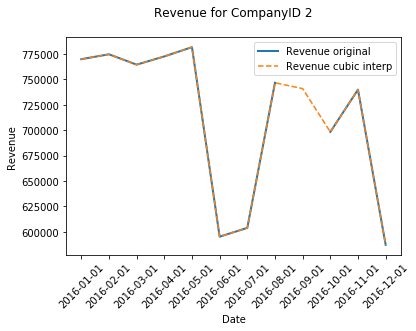

In [16]:
df_revenue_ID2_interp = df_tmp[df_tmp.CompanyID == 2][['Date', 'Revenue']].interpolate(method='cubic').round(2)
x = df_revenue_ID2_interp.Date
plt.plot(x, df_tmp[df_tmp.CompanyID == 2].Revenue, lw=2, label='Revenue original')
plt.plot(x, df_revenue_ID2_interp.Revenue, ls='--', label='Revenue cubic interp')
plt.title('Revenue for CompanyID 2\n')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.legend();

In [18]:
df_tmp['Revenue'].loc[more_nan_ind] = df_revenue_ID2_interp['Revenue'].loc[more_nan_ind]
df_tmp.loc[more_nan_ind]

,Date,CompanyID,Employees,Revenue,Expenses,Profit,LossFlag,Region,BusinessValuation,CloseFlag
32,2016-09-01,2,74,740867.73,NaN,388524.8,0.0,A,24061.54,0


In [19]:
df_tmp['Expenses'].loc[more_nan_ind] = df_tmp['Revenue'].loc[more_nan_ind] - df_tmp['Profit'].loc[more_nan_ind]
df_tmp.loc[more_nan_ind]

,Date,CompanyID,Employees,Revenue,Expenses,Profit,LossFlag,Region,BusinessValuation,CloseFlag
32,2016-09-01,2,74,740867.73,352342.93,388524.8,0.0,A,24061.54,0


## Check if there is any NaN left for open businesses

In [20]:
df_tmp[df_tmp.CloseFlag != 1.].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166 entries, 0 to 1199
Data columns (total 10 columns):
Date                 1166 non-null object
CompanyID            1166 non-null int64
Employees            1166 non-null int64
Revenue              1166 non-null float64
Expenses             1166 non-null float64
Profit               1166 non-null float64
LossFlag             1154 non-null float64
Region               1166 non-null object
BusinessValuation    1166 non-null float64
CloseFlag            1166 non-null int32
dtypes: float64(5), int32(1), int64(2), object(2)
memory usage: 95.6+ KB


## There are some missed values in LossFlag let's check it

In [21]:
# let's find indexes with this conditionslook at these values
bv_nan_ind = df_tmp.index[(df_tmp.CloseFlag != 1.) & (df_tmp.LossFlag.isna())].tolist()
df_tmp.loc[bv_nan_ind]

,Date,CompanyID,Employees,Revenue,Expenses,Profit,LossFlag,Region,BusinessValuation,CloseFlag
196,2016-05-01,22,49,634312.01,11356.87,622955.14,NaN,C,28605.49,0
214,2016-11-01,24,97,788793.44,339823.82,448969.61,NaN,E,14118.11,0
260,2016-09-01,62,47,567197.95,272588.76,294609.19,NaN,A,13804.80,0
309,2016-10-01,48,19,769103.90,265866.54,503237.36,NaN,B,15499.67,0
343,2016-08-01,82,79,921507.43,287764.46,633742.97,NaN,E,20991.38,0
461,2016-06-01,63,24,666713.78,312618.24,354095.55,NaN,B,20018.43,0
468,2016-01-01,74,49,894413.08,340910.15,553502.93,NaN,A,49119.64,0
551,2016-12-01,15,41,618832.72,401744.09,217088.63,NaN,A,7990.38,0
915,2016-04-01,20,499,103981.24,105106.24,-1125.01,NaN,B,-78.36,0
942,2016-07-01,72,154,155051.65,137684.05,17367.61,NaN,E,604.73,0


## Let's set LossFlag to 1 for all Profit <0, and 0 for Profit >=0

In [26]:
new_selected_LossFlag = df_tmp.loc[bv_nan_ind]['Profit'] < 0
new_selected_LossFlag.astype(int)
df_tmp['LossFlag'].loc[bv_nan_ind] = new_selected_LossFlag
df_tmp.loc[bv_nan_ind]

,Date,CompanyID,Employees,Revenue,Expenses,Profit,LossFlag,Region,BusinessValuation,CloseFlag
196,2016-05-01,22,49,634312.01,11356.87,622955.14,False,C,28605.49,0
214,2016-11-01,24,97,788793.44,339823.82,448969.61,False,E,14118.11,0
260,2016-09-01,62,47,567197.95,272588.76,294609.19,False,A,13804.80,0
309,2016-10-01,48,19,769103.90,265866.54,503237.36,False,B,15499.67,0
343,2016-08-01,82,79,921507.43,287764.46,633742.97,False,E,20991.38,0
461,2016-06-01,63,24,666713.78,312618.24,354095.55,False,B,20018.43,0
468,2016-01-01,74,49,894413.08,340910.15,553502.93,False,A,49119.64,0
551,2016-12-01,15,41,618832.72,401744.09,217088.63,False,A,7990.38,0
915,2016-04-01,20,499,103981.24,105106.24,-1125.01,True,B,-78.36,0
942,2016-07-01,72,154,155051.65,137684.05,17367.61,False,E,604.73,0


## Last check if there is any NaN left for open businesses

In [31]:
df_tmp[df_tmp.CloseFlag != 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166 entries, 0 to 1199
Data columns (total 10 columns):
Date                 1166 non-null object
CompanyID            1166 non-null int64
Employees            1166 non-null int64
Revenue              1166 non-null float64
Expenses             1166 non-null float64
Profit               1166 non-null float64
LossFlag             1166 non-null object
Region               1166 non-null object
BusinessValuation    1166 non-null float64
CloseFlag            1166 non-null int32
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 95.6+ KB


## Everything looks good for open companies. Let's check the closed businesses and set np.NaN for closed businesses for:

**'Revenue', 'Expenses', 'Profit', 'LossFlag', 'BusinessValuation'**

In [33]:
df_tmp[df_tmp.CloseFlag == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 748 to 1043
Data columns (total 10 columns):
Date                 34 non-null object
CompanyID            34 non-null int64
Employees            34 non-null int64
Revenue              0 non-null float64
Expenses             0 non-null float64
Profit               0 non-null float64
LossFlag             0 non-null object
Region               34 non-null object
BusinessValuation    0 non-null float64
CloseFlag            34 non-null int32
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 2.8+ KB


In [34]:
# replace vaues with np.NaN
df_tmp.loc[df_tmp.CloseFlag == 1, ['Revenue', 'Expenses', 'Profit', 'LossFlag', 'BusinessValuation']] = np.NaN
df_tmp[df_tmp.CloseFlag == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 748 to 1043
Data columns (total 10 columns):
Date                 34 non-null object
CompanyID            34 non-null int64
Employees            34 non-null int64
Revenue              0 non-null float64
Expenses             0 non-null float64
Profit               0 non-null float64
LossFlag             0 non-null object
Region               34 non-null object
BusinessValuation    0 non-null float64
CloseFlag            34 non-null int32
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 2.8+ KB


## Final check of the DataFrame and saving results in to csv

In [43]:
display(df_tmp.head())
display(df_tmp.info())
display(df_tmp.describe())
print('\nNaN STATISTICS')
display(df_tmp.isna().sum())
print('Total rows makred with CloseFlag == 1: {:d}'.format((df_tmp.CloseFlag == 1).sum()))

,Date,CompanyID,Employees,Revenue,Expenses,Profit,LossFlag,Region,BusinessValuation,CloseFlag
0,2016-01-01,26,54,929805.23,274406.75,655398.48,0,A,44840.36,0
1,2016-02-01,26,54,945682.01,316877.41,628804.60,0,A,50344.14,0
2,2016-03-01,26,54,809434.40,252932.49,556501.91,0,A,40175.79,0
3,2016-04-01,26,54,924571.51,307911.34,616660.17,0,A,42020.35,0
4,2016-05-01,26,54,676168.26,354345.84,321822.42,0,A,19198.59,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
Date                 1200 non-null object
CompanyID            1200 non-null int64
Employees            1200 non-null int64
Revenue              1166 non-null float64
Expenses             1166 non-null float64
Profit               1166 non-null float64
LossFlag             1166 non-null object
Region               1200 non-null object
BusinessValuation    1166 non-null float64
CloseFlag            1200 non-null int32
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 89.1+ KB


None

,CompanyID,Employees,Revenue,Expenses,Profit,BusinessValuation,CloseFlag
count,1200.000000,1200.000000,1166.000000,1166.000000,1166.000000,1166.000000,1200.000000
mean,49.500000,208.270000,425654.351955,223899.932633,201754.419417,13114.752487,0.028333
std,28.878105,243.010718,333544.404481,135013.564370,296134.680281,20650.726418,0.165993
min,0.000000,10.000000,620.690000,1709.310000,-454431.650000,-44686.900000,0.000000
25%,24.750000,47.750000,90956.720000,90465.210000,-34573.602500,-2132.360000,0.000000
50%,49.500000,89.500000,343031.240000,232387.625000,180390.945000,9317.785000,0.000000
75%,74.250000,286.750000,744631.547500,329058.290000,473767.482500,28616.585000,0.000000
max,99.000000,989.000000,999956.030000,499873.510000,940167.100000,78344.680000,1.000000



NaN STATISTICS


Date                  0
CompanyID             0
Employees             0
Revenue              34
Expenses             34
Profit               34
LossFlag             34
Region                0
BusinessValuation    34
CloseFlag             0
dtype: int64

Total rows makred with CloseFlag == 1: 34


In [44]:
# Saving dataframe into .csv
df_tmp.to_csv('cleaned_financial_artificial_dataset_AK.csv', index=False)